<div dir="ltr" style="text-align: left;" trbidi="on">
<h2 style="text-align: left;">
100 Days of ML Day 63</h2>
<h3 style="text-align: left;">
HackerEarth Airplane Accident Severity Challenge Part 3</h3>
Since many features roughly follow normal distribution(observed using plots) I tried using multivariate normal pdf to predict which of the four severity does the accident most likely belong. But results were terrible even on the training set(42% accuracy). No improvements on the leaderboard.<br />
<br />
Code: <a href="https://github.com/hithesh111/Hith100/blob/master/100Days/day063.ipynb">https://github.com/hithesh111/Hith100/blob/master/100Days/day063.ipynb</a><br />
<br />
Competition: <a href="https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/">https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/</a><br />
<br />
Leaderboard: <a href="https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/leaderboard/how-severe-can-an-airplane-accident-be-03e7a3f1/">https://www.hackerearth.com/challenges/competitive/airplane-accident-severity-hackerearth-machine-learning-challenge/leaderboard/how-severe-can-an-airplane-accident-be-03e7a3f1/</a></div>


In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/hithesh/Downloads/Airplane Data/train.csv')
print(df.head(),df.shape)

                                  Severity  Safety_Score  \
0                Minor_Damage_And_Injuries     49.223744   
1                Minor_Damage_And_Injuries     62.465753   
2        Significant_Damage_And_Fatalities     63.059361   
3  Significant_Damage_And_Serious_Injuries     48.082192   
4        Significant_Damage_And_Fatalities     26.484018   

   Days_Since_Inspection  Total_Safety_Complaints  Control_Metric  \
0                     14                       22       71.285324   
1                     10                       27       72.288058   
2                     13                       16       66.362808   
3                     11                        9       74.703737   
4                     13                       25       47.948952   

   Turbulence_In_gforces  Cabin_Temperature  Accident_Type_Code  \
0               0.272118              78.04                   2   
1               0.423939              84.54                   2   
2               0.32260

In [3]:
df['Adverse_Weather_Metric'] = df['Adverse_Weather_Metric']-df['Adverse_Weather_Metric'].mean()/df['Adverse_Weather_Metric'].std()

df['Severity'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [4]:
df1 = df[df['Severity']=='Minor_Damage_And_Injuries']
df2 = df[df['Severity']=='Significant_Damage_And_Fatalities']
df3 = df[df['Severity']=='Significant_Damage_And_Serious_Injuries']
df4 = df[df['Severity']=='Highly_Fatal_And_Damaging']
print(df1.shape,df2.shape,df3.shape,df4.shape)

(2527, 12) (1695, 12) (2729, 12) (3049, 12)


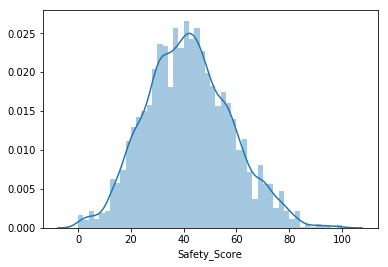

In [5]:
sns.distplot(df['Safety_Score'])

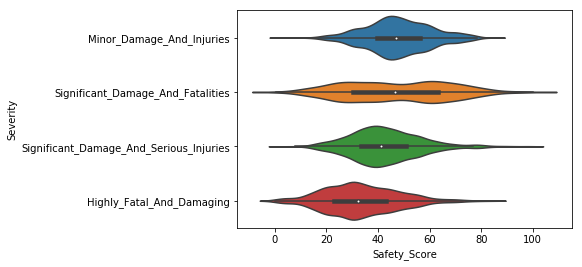

In [6]:
sns.violinplot(x=df['Safety_Score'],y=df['Severity'])

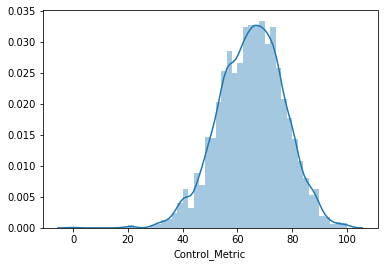

In [7]:
sns.distplot(df['Control_Metric'])

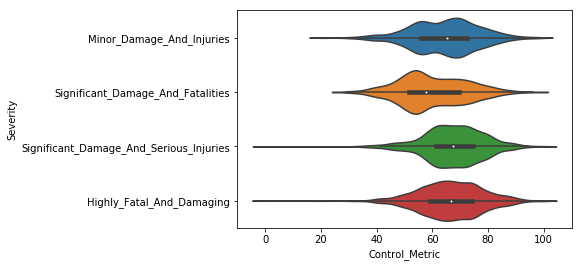

In [8]:
sns.violinplot(x=df['Control_Metric'],y=df['Severity'])

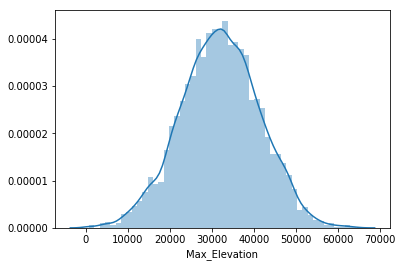

In [9]:
sns.distplot(df['Max_Elevation'])

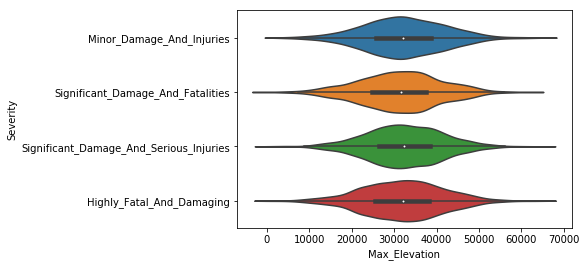

In [10]:
sns.violinplot(x=df['Max_Elevation'],y=df['Severity'])

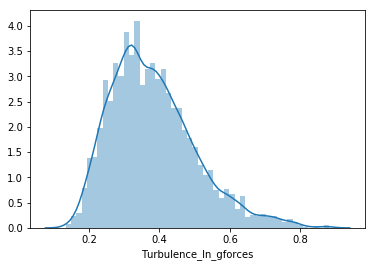

In [11]:
sns.distplot(df['Turbulence_In_gforces'])

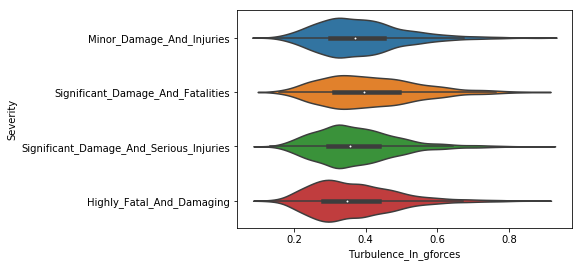

In [12]:
sns.violinplot(x=df['Turbulence_In_gforces'],y=df['Severity'])

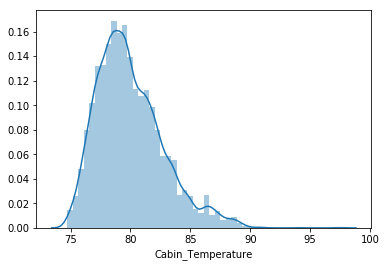

In [13]:
sns.distplot(df['Cabin_Temperature'])

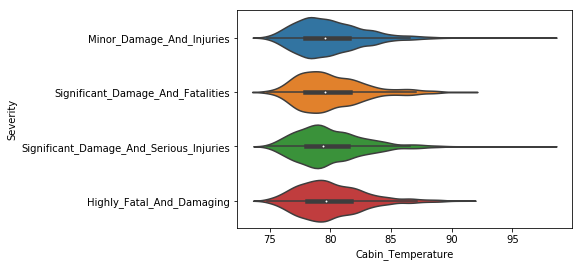

In [14]:
sns.violinplot(x=df['Cabin_Temperature'],y=df['Severity'])

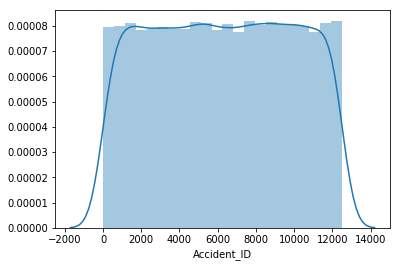

In [15]:
sns.distplot(df['Accident_ID'])

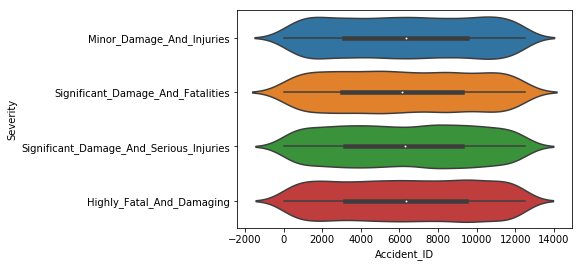

In [16]:
sns.violinplot(x=df['Accident_ID'],y=df['Severity'])

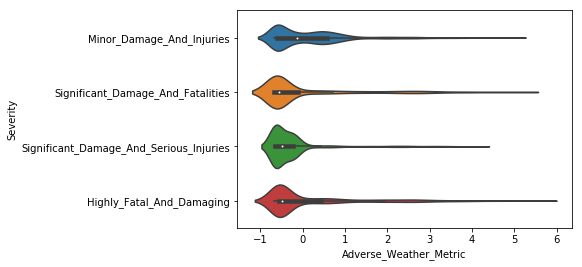

In [17]:
import math
sns.violinplot(x=(df['Adverse_Weather_Metric']-df['Adverse_Weather_Metric'].mean())/df['Adverse_Weather_Metric'].std(),y=df['Severity'])

In [18]:
features = ['Safety_Score','Control_Metric','Adverse_Weather_Metric','Cabin_Temperature','Turbulence_In_gforces','Violations']

df1_y=df1['Severity']
df2_y=df2['Severity']
df3_y=df3['Severity']
df4_y=df4['Severity']

df1=df1[features]
df2=df2[features]
df3=df3[features]
df4=df4[features]

mu1,sigma1 = df1.mean(),df1.std()
mu2,sigma2 = df2.mean(),df2.std()
mu3,sigma3 = df3.mean(),df3.std()
mu4,sigma4 = df4.mean(),df3.std()

In [19]:
import math
def prob(x,mu,ss):
    return math.exp(-(x-mu)**2/(2*ss))/(math.sqrt(2*math.pi*ss))
print(prob(0,0,1),1/(math.sqrt(2*math.pi)))

0.3989422804014327 0.3989422804014327


In [20]:
y = df['Severity']
df = df[features]
pred = []
for i in range(df.shape[0]):
    plist=[]
    p1,p2,p3,p4=10**100,10**100,10**100,10**100
    for j in range(df.shape[1]):
        if(j<=1):
            p1 = p1 * prob(np.float(df.iloc[i,j]),mu1[j],sigma1[j])**3
        else:
            p1 = p1 * prob(np.float(df.iloc[i,j]),mu1[j],sigma1[j])
    plist.append(p1)
    
    for j in range(df.shape[1]):
        if(j<=1):
            p2 = p2 * prob(np.float(df.iloc[i,j]),mu2[j],sigma2[j])**3
        else:
            p2 = p2 * prob(np.float(df.iloc[i,j]),mu2[j],sigma2[j])
    plist.append(p2)
    
    for j in range(df.shape[1]):
        if(j<=1):
            p3 = p3 * prob(np.float(df.iloc[i,j]),mu3[j],sigma3[j])**3
        else:
            p3 = p3 * prob(np.float(df.iloc[i,j]),mu3[j],sigma3[j])
    plist.append(p3)
    
    for j in range(df.shape[1]):
        if(j<=1):
            p4 = p4 * prob(np.float(df.iloc[i,j]),mu4[j],sigma4[j])**3
        else:
            p4 = p4 * prob(np.float(df.iloc[i,j]),mu4[j],sigma4[j])
    plist.append(p4)
    
    pred.append(plist.index(max(plist))+1)
    
pred = pd.Series(pred)

y = y.apply(lambda x: 1 if x=='Minor_Damage_And_Injuries' else(2 if x=='Significant_Damage_And_Fatalities' else(3 if x=='Significant_Damage_And_Serious_Injuries' else 4)))
print((y==pred).sum())

4160
